# Predicting Optimal Fertilizers — EDA Report

**Team:** Garden of Eden  
**Dataset:** Kaggle Playground Series S5E6  
**Author(s):** David Goh (did this EDA document), Arkojit Ghosh, Yu-Hua Chen, Aliza Tarakova  

**Objective:** Explore the dataset to understand feature distributions, relationships with the target (`Fertilizer Name`), and identify patterns to inform modeling.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

(750000, 10) (250000, 9)


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


## 2. Data Loading
- Load train and test datasets
- Show dataset shape and columns

In [ ]:
# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Quick look
print(train.shape, test.shape)
train.head()

## 3. Data Quality Checks
- Check for missing values
- Check for duplicates
- Overview of column types

In [7]:
# Check for missing values
print(train.isnull().sum())

# Check for duplicates
print(f"Duplicate rows: {train.duplicated().sum()}")

# Data types
print(train.dtypes)

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64
Duplicate rows: 0
id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object


## 4. Target Analysis
- Distribution of `Fertilizer Name`
- Counts of each fertilizer type

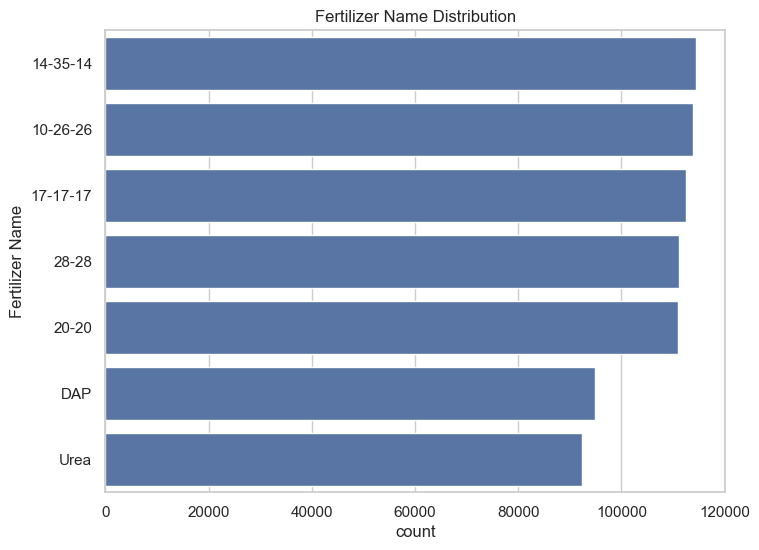

In [12]:
# Distribution of Fertilizer Name
plt.figure(figsize=(8,6))
sns.countplot(y='Fertilizer Name', data=train, order=train['Fertilizer Name'].value_counts().index)
plt.title('Fertilizer Name Distribution')
plt.show()

## 5. Numeric Feature Exploration
- Histograms and boxplots for each numeric feature
- Summary statistics (mean, std, min, max, percentiles)
- Relationships between numeric features and the target

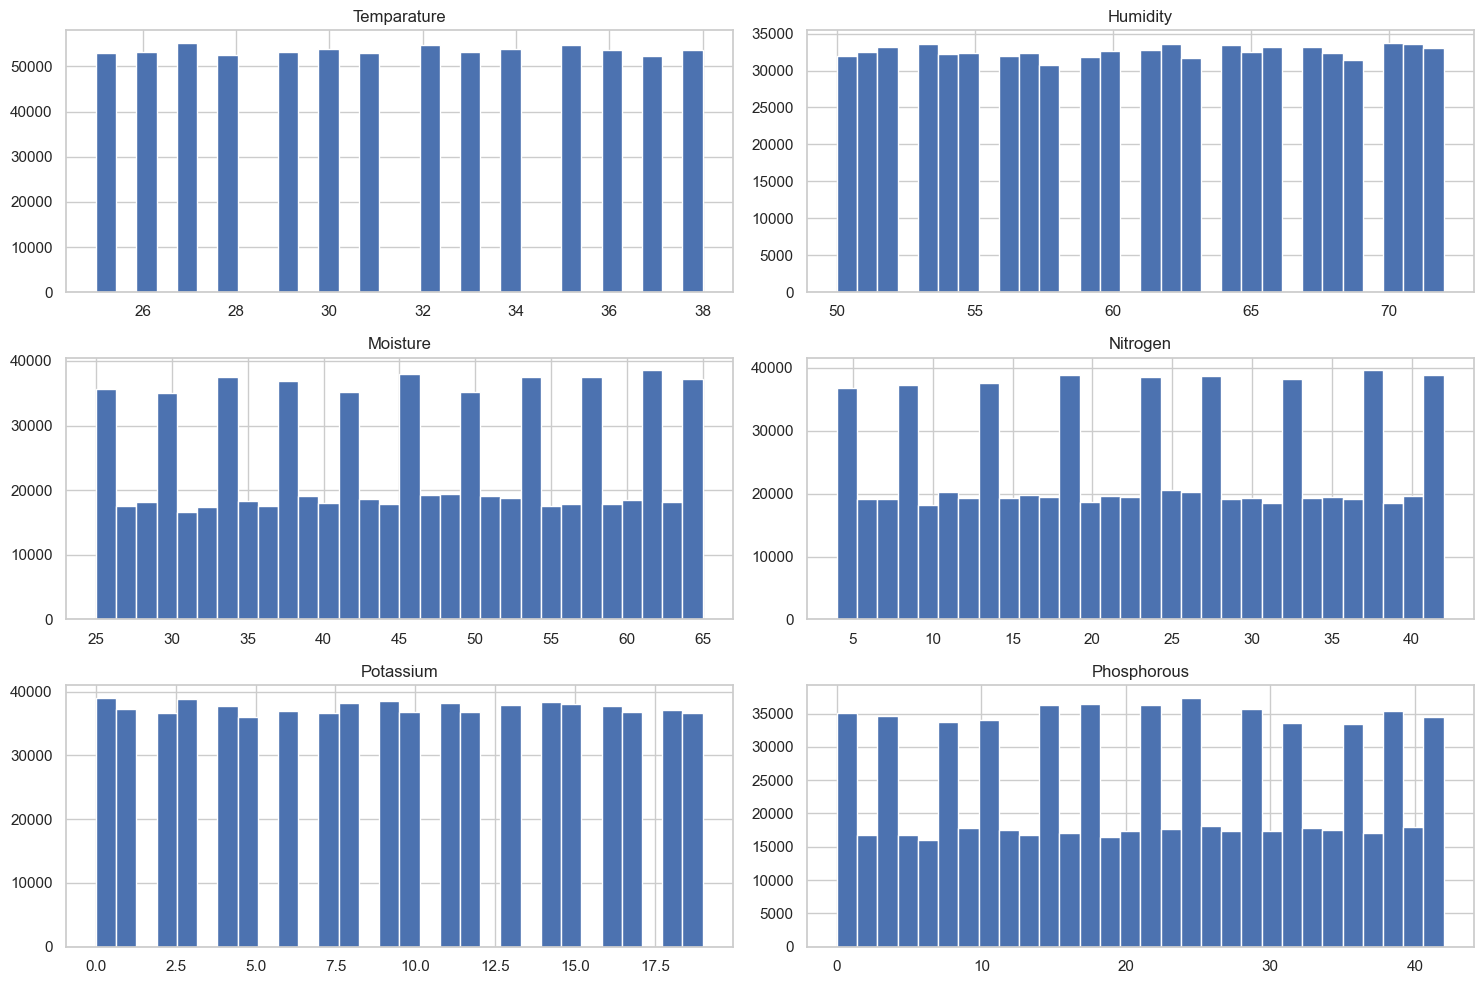

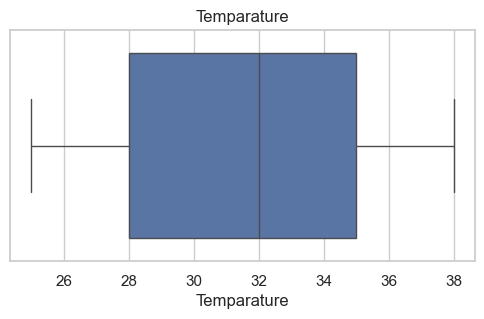

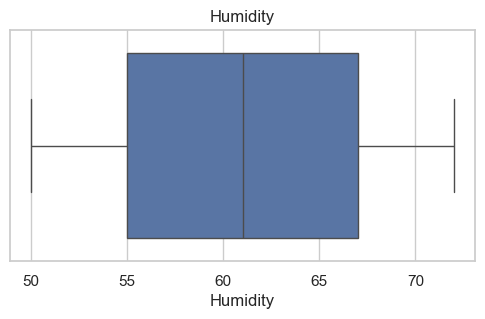

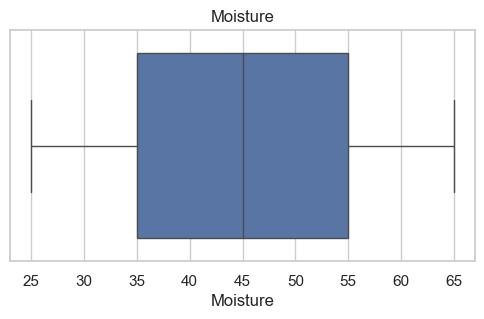

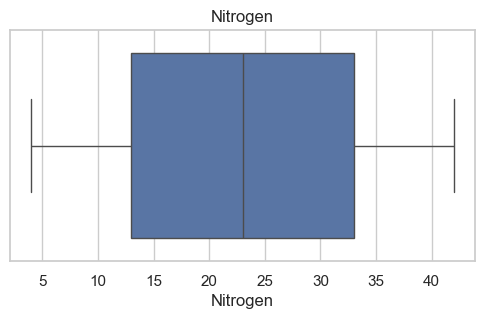

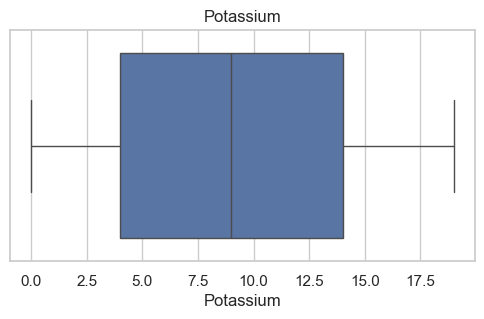

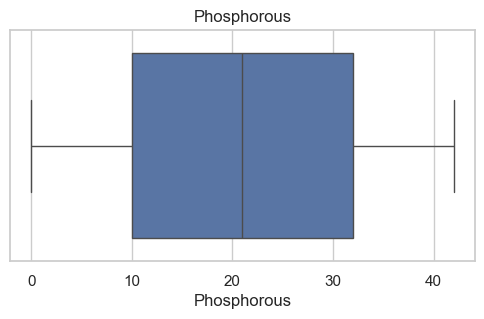

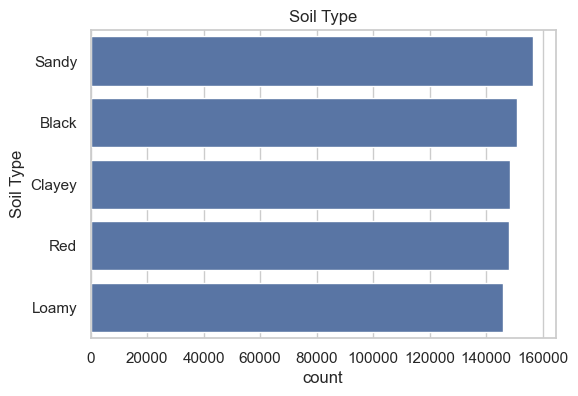

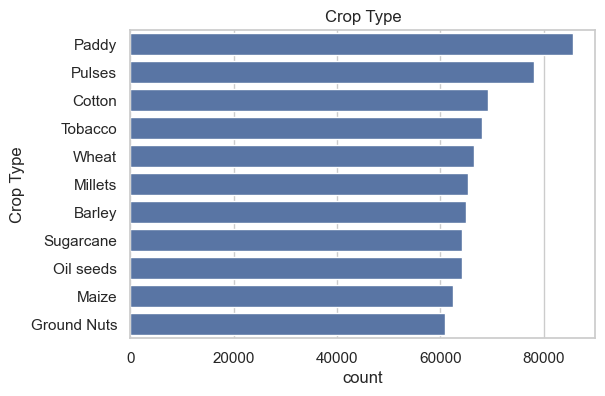

In [11]:
# Numeric features
num_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
train[num_features].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots for numeric features
for col in num_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.show()

# Numeric features vs target
for col in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Fertilizer Name', y=col, data=train)
    plt.title(f'{col} vs Fertilizer Name')
    plt.xticks(rotation=90)
    plt.show()

## 6. Categorical Feature Exploration
- Countplots for each categorical feature (`Soil Type`, `Crop Type`)
- Distribution of categories per `Fertilizer Name`

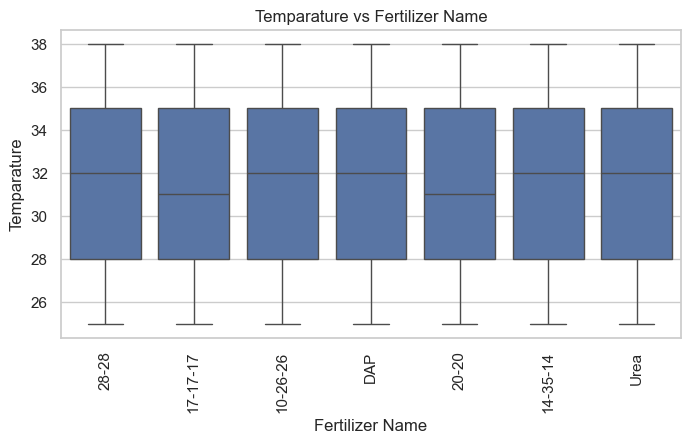

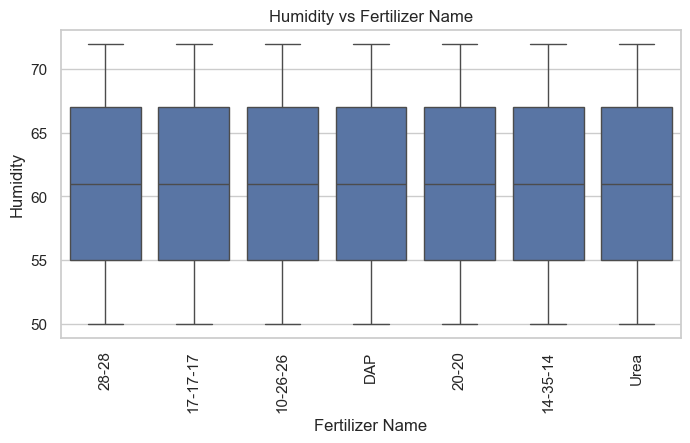

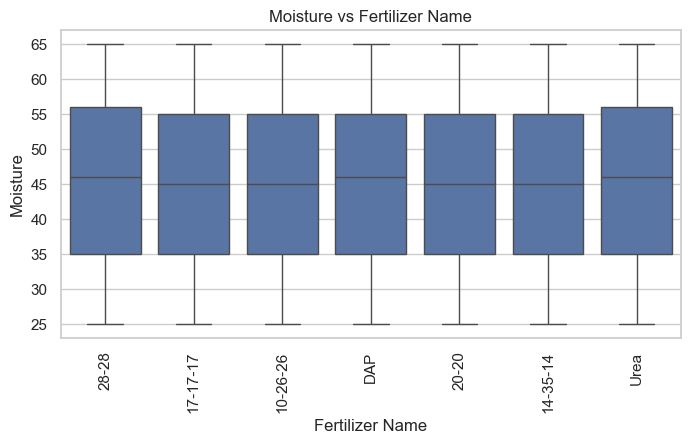

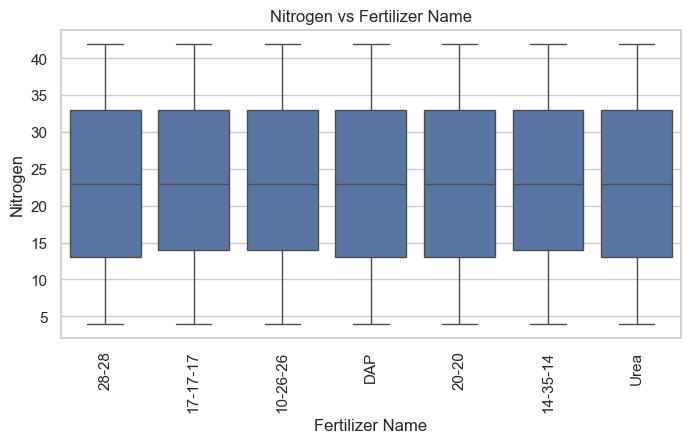

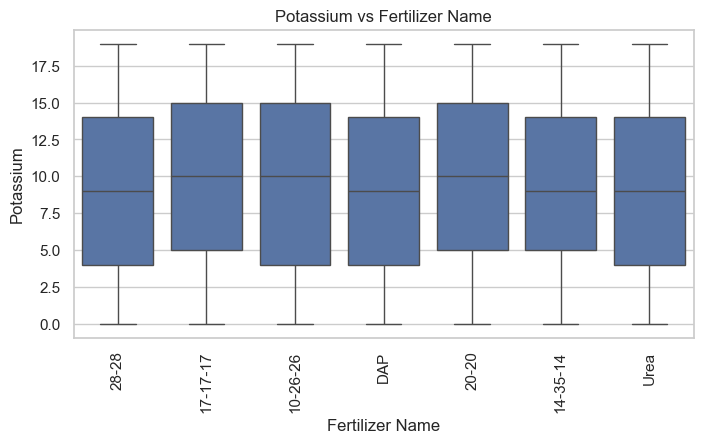

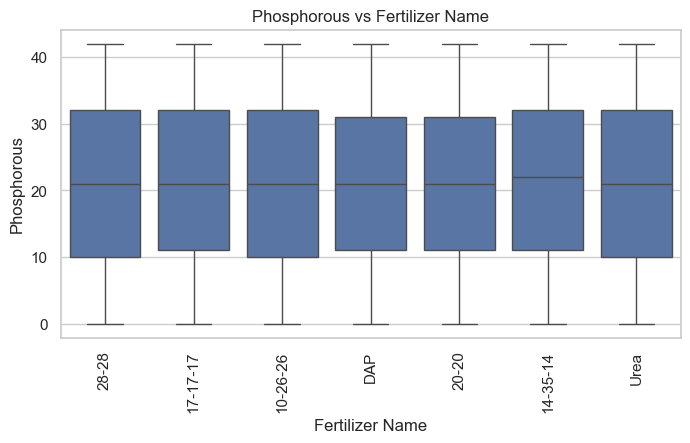

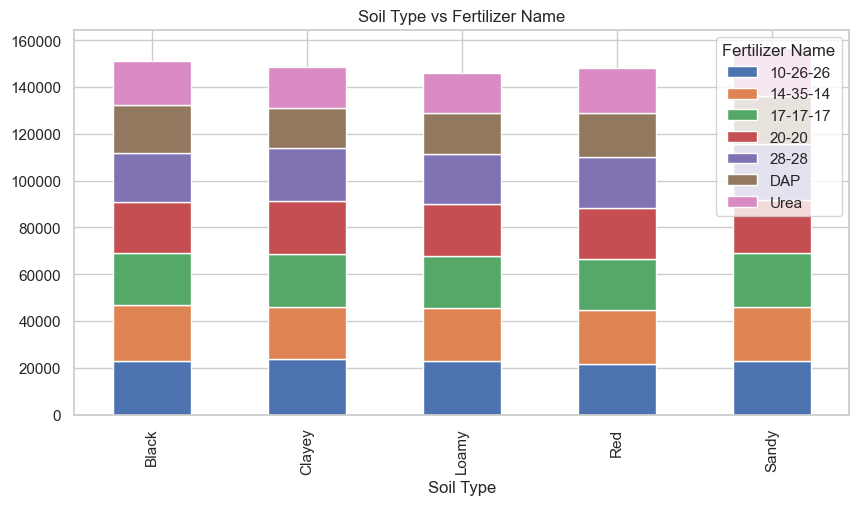

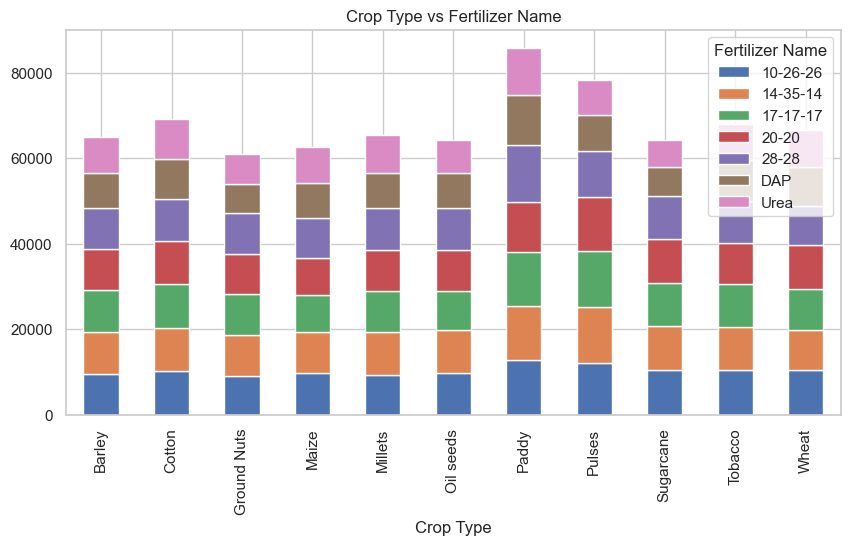

In [13]:
# Categorical features
cat_features = ['Soil Type', 'Crop Type']
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(y=train[col], order=train[col].value_counts().index)
    plt.title(col)
    plt.show()

# Categorical features vs target
for col in cat_features:
    ct = pd.crosstab(train[col], train['Fertilizer Name'])
    ct.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.title(f'{col} vs Fertilizer Name')
    plt.show()

## 7. Correlation Analysis
- Correlation matrix of numeric features
- Optional: heatmap visualization

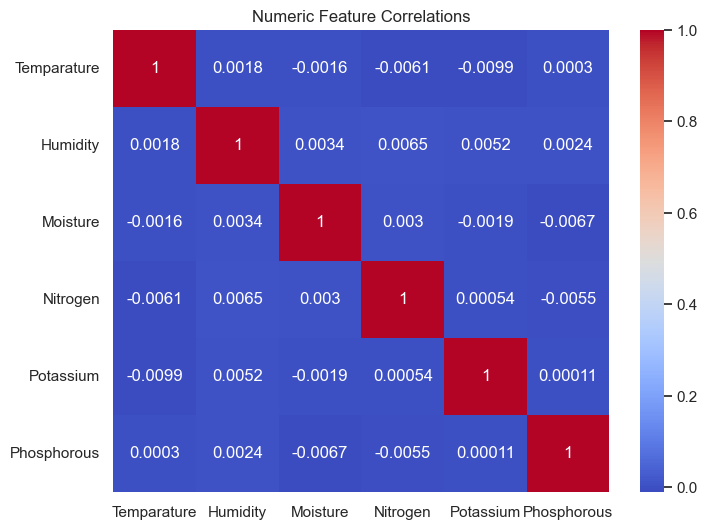

In [14]:
corr = train[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

## 8. Key Observations
- Any interesting patterns / predictive features? At first glance, not really.
- Any class imbalance or unexpected trends? At first glance, no-- all variables are fairly balanced. 
- Multicollinearity? No, every variable seems to be independent from each of the others.

## 9. Next Steps
- Any potential feature engineering
- Potential model choices
- Data drift simulation (bearing in mind this isn't a time series)